<a href="https://colab.research.google.com/github/sphy1597/3-2-ML/blob/main/wine_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 폰트 설치
실행한 뒤 런타임 재시작


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,968 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

구글 드라이브 연동 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필요한 라이브러리 

In [4]:
import pandas as pd
from pandas.io.excel import read_excel
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
import seaborn as sns
import zipfile
import warnings
from matplotlib import rc
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumBarunGothic'



와인 데이터

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,1:red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,1:red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

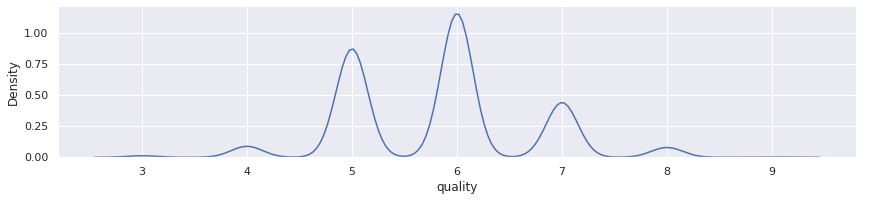

In [9]:
facet = sns.FacetGrid(df, aspect=4)
facet.map(sns.kdeplot, 'quality')
facet.add_legend()

plt.show()

상관관계 분석

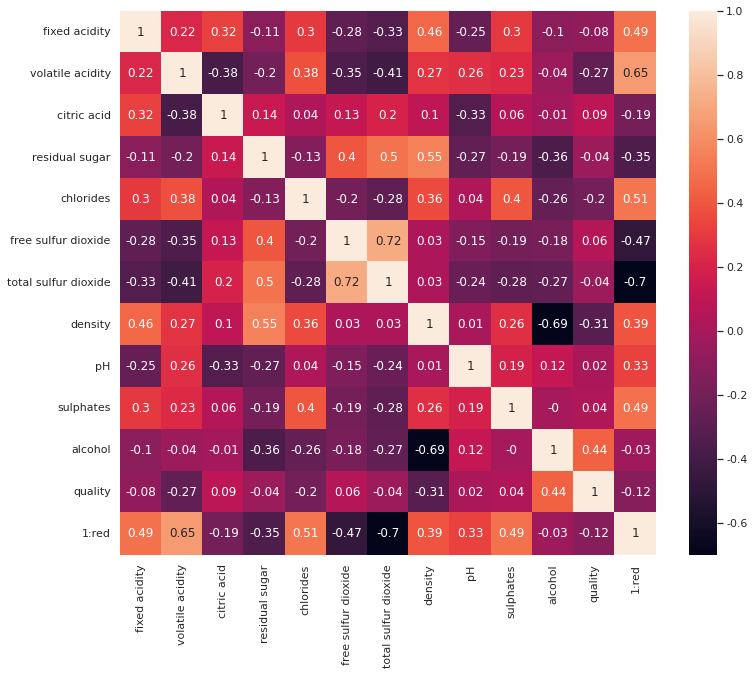

In [10]:
sns.set(font="NanumBarunGothic",rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = df.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

input = df.drop(['quality', '1:red'], axis=1)
target = df['quality']

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2) 

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)





In [21]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)


LinearRegression()

In [22]:
print('예측점수 : ', regr.score(x_test,y_test))

예측점수 :  0.2673807211958793


In [23]:
from sklearn.metrics import mean_squared_error
y_hat_test = regr.predict(x_test)
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 0.5590184214022408
